In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import f_oneway 
from sklearn.linear_model import LinearRegression

%matplotlib inline

Notes
alcohol, volatitle, citric, sulphates


In [3]:
red = pd.read_csv('winequality-red.csv', sep=';')
#white = pd.read_csv('winequality-white.csv', sep=';')
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
#white

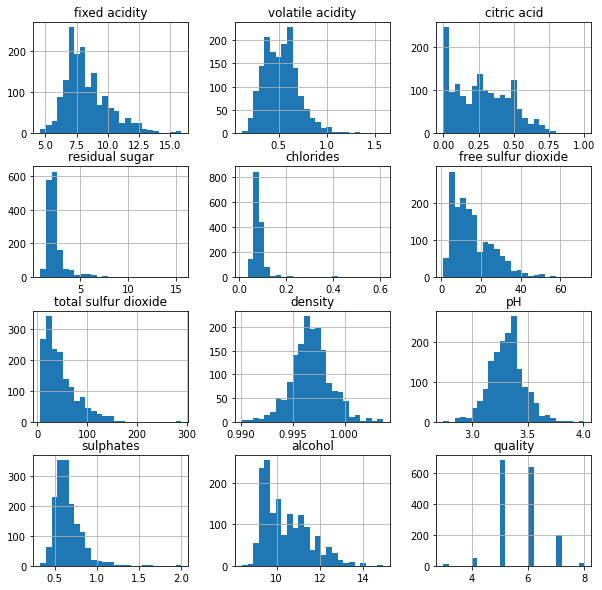

In [5]:
red.hist(bins=25,figsize=(10,10))
plt.show()

In [6]:
#white.hist(bins=25,figsize=(10,10))
#plt.show()

<AxesSubplot:>

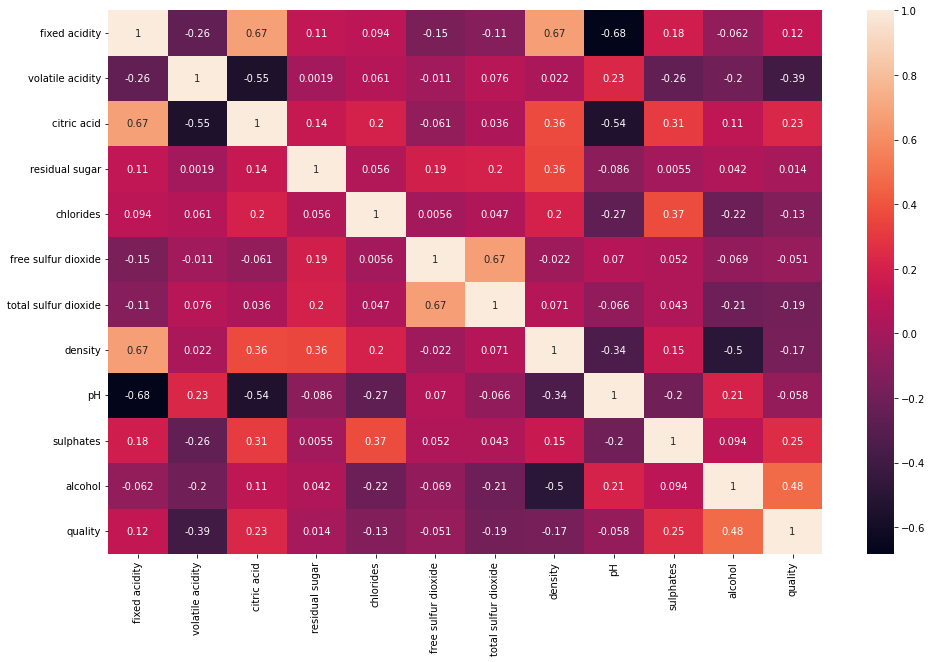

In [7]:
plt.figure(figsize=(16,10))
sb.heatmap(red.corr(),annot=True)

In [8]:
#plt.figure(figsize=(16,10))
#sb.heatmap(white.corr(),annot=True)

In [9]:
compare = red.loc[:,['alcohol','quality']]
compare = compare.rename(columns={'alcohol':'red alcohol','quality':'red quality',})
#compare['white alcohol'] = white['alcohol']
#compare['white quality'] = white['quality']
compare

,red alcohol,red quality
0,9.4,5
1,9.8,5
2,9.8,5
3,9.8,6
4,9.4,5
...,...,...
1594,10.5,5
1595,11.2,6
1596,11.0,6
1597,10.2,5


In [20]:
from sklearn.metrics import r2_score
y =red['alcohol']
f =red['quality']
r2 = r2_score(y, f)
print('r2 score for perfect model is', r2)

KeyError: 'quality'

In [10]:
quality = red["quality"].values
category = []
for num in quality:
    if num<6:
        category.append("Bad")
    elif num>7:
        category.append("Good")
    else:
        category.append("Medium")


In [11]:
category = pd.DataFrame(data=category, columns=["category"])
red = pd.concat([red,category],axis=1)
red.drop(columns="quality",axis=1,inplace=True)


In [12]:
red.head(25)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,category
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Medium
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Bad
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,Bad
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,Bad
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,Medium
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,Medium
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,Bad


C:\Users\mtoy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Medium    837
Bad       744
Good       18
Name: category, dtype: int64

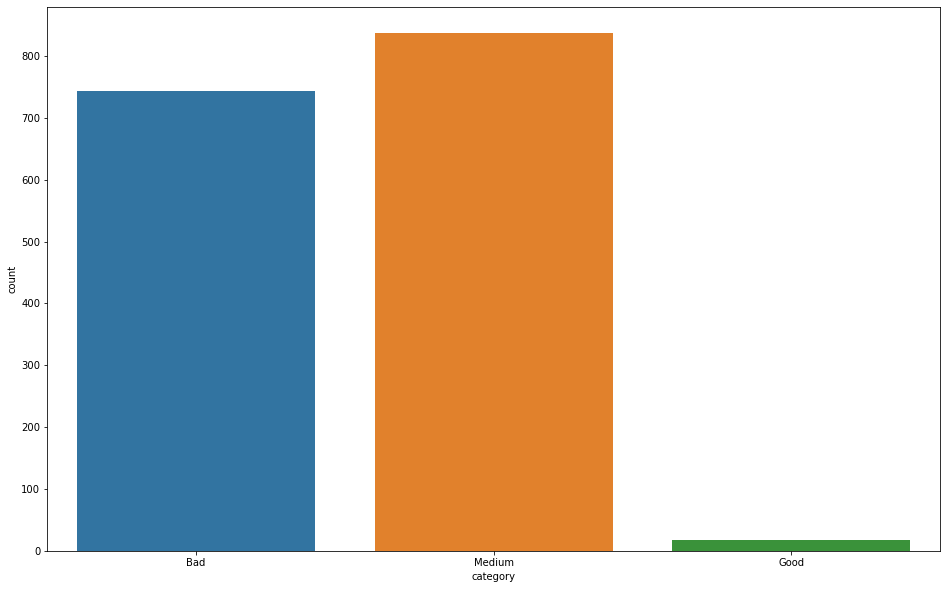

In [13]:
plt.figure(figsize=(16,10))
sb.countplot(red["category"])
red["category"].value_counts()

model = LinearRegression()
X, y = red[['alcohol', 'category']], red.score
model.fit(X, y)
r_squared = model.score(X, y)
print(r_squared)

In [19]:
from sklearn.metrics import r2_score
y =red['alcohol']
f =red['quality']
r2 = r2_score(y, f)
print('r2 score for perfect model is', r2)


KeyError: 'quality'

In [ ]:
#look at references for other info we can use